## Load data

In [61]:
from tensorflow.keras.datasets import mnist

In [62]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [63]:
X_train.shape

(60000, 28, 28)

In [64]:
y_train.shape

(60000,)

In [65]:
X_test.shape

(10000, 28, 28)

In [66]:
y_test.shape

(10000,)

In [67]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '4')

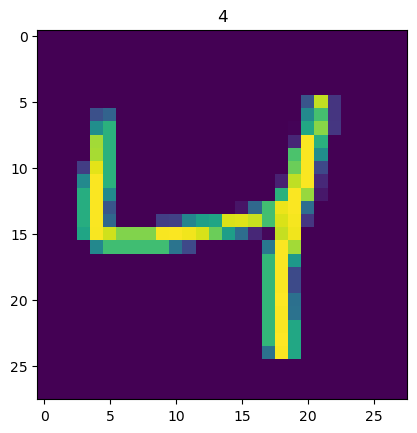

In [68]:
index = 2

plt.imshow(X_train[index])
plt.title(y_train[index])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

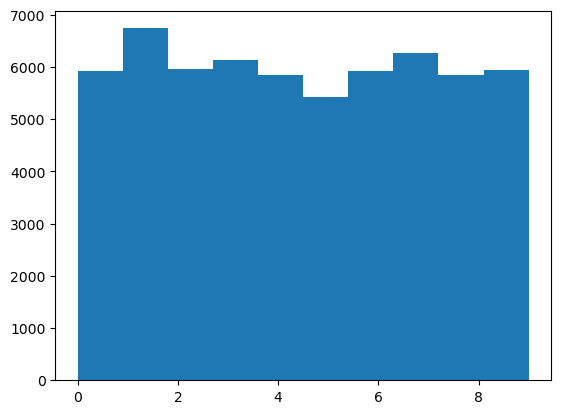

In [69]:
plt.hist(y_train, bins=10)

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

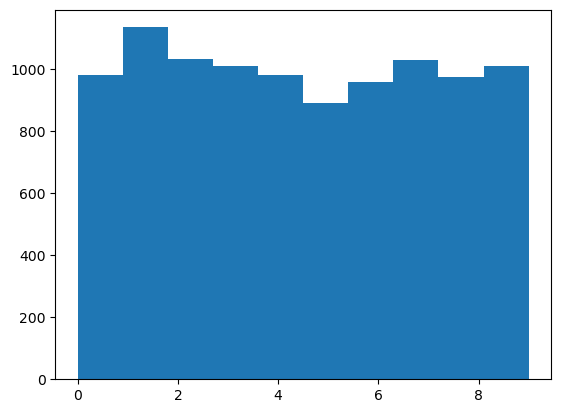

In [70]:
plt.hist(y_test, bins=10)

## Prepare the data

In [71]:
X_train = X_train / 255
X_test = X_test / 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [72]:
print(f"Min: {X_train.min()}")
print(f"Max: {X_train.max()}")

Min: 0.0
Max: 1.0


Text(0.5, 1.0, '4')

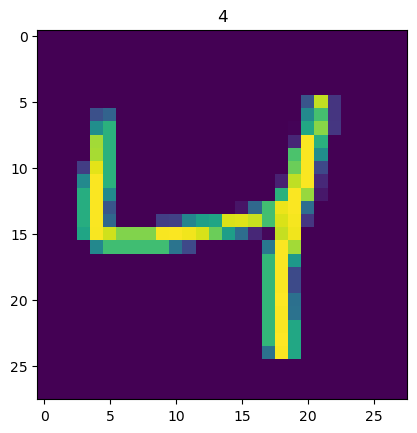

In [91]:
index = 2

plt.imshow(X_train[index])
plt.title(np.argmax(y_train[index]))

## Define model

In [80]:
import numpy as np

import tensorflow as tf


tf.random.set_seed(23)
np.random.seed(23)

In [81]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28, )))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=tf.keras.metrics.categorical_crossentropy)


In [82]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Train the model


In [83]:
epochs = 20

history = model.fit(X_train,
                    y_train,
                    batch_size=None,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2530 - categorical_crossentropy: 0.2530 - val_loss: 0.1282 - val_categorical_crossentropy: 0.1282
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1064 - categorical_crossentropy: 0.1064 - val_loss: 0.0961 - val_categorical_crossentropy: 0.0961
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0690 - categorical_crossentropy: 0.0690 - val_loss: 0.0815 - val_categorical_crossentropy: 0.0815
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0499 - categorical_crossentropy: 0.0499 - val_loss: 0.0778 - val_categorical_crossentropy: 0.0778
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0372 - categorical_crossentropy: 0.0372 - val_loss: 0.0741 - val_categorical_crossentropy: 0.0741
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0271 - categorical_crossentropy: 0.0271 - 

In [84]:
model.evaluate(X_test,
               y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1208 - categorical_crossentropy: 0.1208


[0.12082827091217041, 0.12082827091217041]

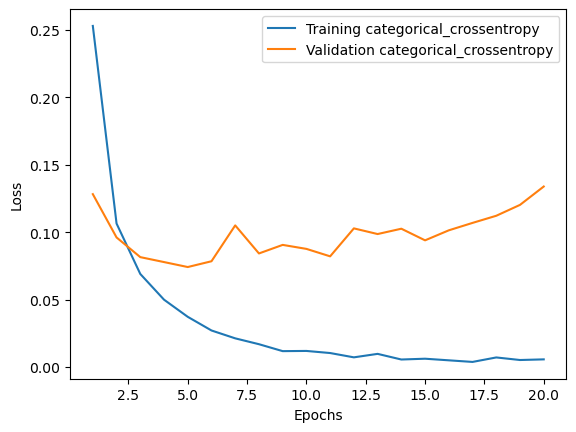

In [85]:
epochs = range(1, len(history.history["categorical_crossentropy"])+1)

plt.plot(epochs, history.history["categorical_crossentropy"],
         label='Training categorical_crossentropy')
plt.plot(epochs, history.history["val_categorical_crossentropy"],
         label='Validation categorical_crossentropy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test model

In [ ]:
plt

In [100]:
index = 2

In [101]:
X_first_test = X_test[index, :]
X_first_test = X_first_test.reshape(1, 28, 28)

In [102]:
pred_first = model.predict(X_first_test)
np.argmax(pred_first)

1

Text(0.5, 1.0, '1')

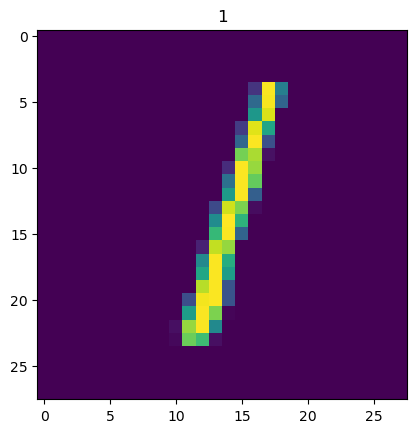

In [104]:
plt.imshow(X_test[index])
plt.title(np.argmax(y_test[index]))

In [117]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=1)

In [120]:
tf.math.confusion_matrix(np.argmax(y_test, axis=1), pred_test)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    1,    1,    0,    3,    3,    1,    2,    0],
       [   0, 1124,    1,    4,    0,    0,    3,    0,    2,    1],
       [   2,    2,  986,    4,    1,    0,    4,    6,   26,    1],
       [   0,    0,    0,  988,    0,    7,    0,    4,    8,    3],
       [   1,    2,    6,    0,  947,    1,    6,    1,    3,   15],
       [   2,    1,    0,    4,    0,  876,    2,    0,    4,    3],
       [   1,    2,    1,    0,    1,    2,  949,    0,    2,    0],
       [   2,    3,    7,    5,    2,    0,    0, 1002,    1,    6],
       [   0,    2,    0,    5,    0,    4,    0,    2,  959,    2],
       [   2,    4,    0,    2,    4,    3,    1,    6,    1,  986]],
      dtype=int32)>

In [121]:
model.save("../models/tf_multi_class/tf_multi_class.model")

INFO:tensorflow:Assets written to: ../models/tf_multi_class/tf_multi_class.model/assets
